#**Amazon Product Review Analysis**

**Mounting the drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Reading the JSON file**

In [3]:
#IMPORTING REQUIRED LIBRARIES

import pandas as pd
import re
from spacy.lang.en.stop_words import STOP_WORDS
from bs4 import BeautifulSoup
from textblob import TextBlob
import spacy
import nltk
nltk.download('all')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

!pip install pyabsa
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 250 kB 24.7 MB/s 
     |████████████████████████████████| 1.3 MB 70.3 MB/s 
     |████████████████████████████████| 182 kB 72.9 MB/s 
     |████████████████████████████████| 43 kB 2.5 MB/s 
     |████████████████████████████████| 314 kB 68.7 MB/s 
     |████████████████████████████████| 5.3 MB 56.4 MB/s 
     |████████████████████████████████| 54 kB 3.0 MB/s 
     |████████████████████████████████| 163 kB 69.8 MB/s 
     |████████████████████████████████| 7.6 MB 55.0 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
  Created wheel for pytorch-warmup: filename=pytorch_warmup-0.1.0-py3-none-any.whl size=5802 sha256=e4c93bc3df6842e0fd3ae0465a304c16fafbd5d9a4ea433db3237971687a3ee0
  Stored in directory: /root/.cache/pip/wheels/c7/5d/24/9475e442daa1e9332c122c79fb5131b9e4e91946009365902e
  Created wheel for seqeval: filename=seqeval-1.2.2-py3

#**Toys and games dataset**

In [4]:
#IMPORTING DATA IN PANDAS

review_toys_games = pd.read_json("/content/drive/MyDrive/ML/Data/reviews_Toys_and_Games_5.json.gz", lines=True)
review_toys_games.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1VXOAVRGKGEAK,0439893577,Angie,"[0, 0]",I like the item pricing. My granddaughter want...,5,Magnetic board,1390953600,"01 29, 2014"
1,A8R62G708TSCM,0439893577,Candace,"[1, 1]",Love the magnet easel... great for moving to d...,4,it works pretty good for moving to different a...,1395964800,"03 28, 2014"
2,A21KH420DK0ICA,0439893577,capemaychristy,"[1, 1]",Both sides are magnetic. A real plus when you...,5,love this!,1359331200,"01 28, 2013"
3,AR29QK6HPFYZ4,0439893577,dcrm,"[0, 0]",Bought one a few years ago for my daughter and...,5,Daughters love it,1391817600,"02 8, 2014"
4,ACCH8EOML6FN5,0439893577,DoyZ,"[1, 1]",I have a stainless steel refrigerator therefor...,4,Great to have so he can play with his alphabet...,1399248000,"05 5, 2014"


Reading the Json file and converted Json file to pandas dataframe.

These are the first five samples of Toys and Games dataset.

####**As there are two files, to overcome the problem of writing the same code twice, defining the functions.**

In [5]:
#CHECK DATA IN PANDAS

def datacheck(text):
    print ("================================================")
    # change column name 
    text = text.rename(columns={'overall': 'Rating'})

    print ("Total dataset:", str(text.shape))
    print()
    
    ### Total reviews
    total = len(text)
    print ("Number of reviews: ",total)
    print ()

    ### How many unique reviewers?
    print ("Number of unique reviewers: ",len(text.reviewerID.unique()))
    print ()

    ### How many unique products?
    print ("Number of unique products: ", len(text.asin.unique()))
    print ()

    ### Average rating score
    print ("Average rating score: ",round(text.Rating.mean(),3))
    print()

    ### PRINTING THE INFO OF DATA
    print(text.info())

    print ("================================================")
    print()
    return text

In [6]:
#Calling the datacheck function

review_toys_games1= datacheck(review_toys_games)
review_toys_games1.head()

Total dataset: (167597, 9)

Number of reviews:  167597

Number of unique reviewers:  19412

Number of unique products:  11924

Average rating score:  4.356

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167597 entries, 0 to 167596
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   reviewerID      167597 non-null  object
 1   asin            167597 non-null  object
 2   reviewerName    166759 non-null  object
 3   helpful         167597 non-null  object
 4   reviewText      167597 non-null  object
 5   Rating          167597 non-null  int64 
 6   summary         167597 non-null  object
 7   unixReviewTime  167597 non-null  int64 
 8   reviewTime      167597 non-null  object
dtypes: int64(2), object(7)
memory usage: 11.5+ MB
None



,reviewerID,asin,reviewerName,helpful,reviewText,Rating,summary,unixReviewTime,reviewTime
0,A1VXOAVRGKGEAK,0439893577,Angie,"[0, 0]",I like the item pricing. My granddaughter want...,5,Magnetic board,1390953600,"01 29, 2014"
1,A8R62G708TSCM,0439893577,Candace,"[1, 1]",Love the magnet easel... great for moving to d...,4,it works pretty good for moving to different a...,1395964800,"03 28, 2014"
2,A21KH420DK0ICA,0439893577,capemaychristy,"[1, 1]",Both sides are magnetic. A real plus when you...,5,love this!,1359331200,"01 28, 2013"
3,AR29QK6HPFYZ4,0439893577,dcrm,"[0, 0]",Bought one a few years ago for my daughter and...,5,Daughters love it,1391817600,"02 8, 2014"
4,ACCH8EOML6FN5,0439893577,DoyZ,"[1, 1]",I have a stainless steel refrigerator therefor...,4,Great to have so he can play with his alphabet...,1399248000,"05 5, 2014"


There are 9 features and 167597 samples of data. 

Rating and unixReviewTime features are of int type, remaining features are of object type. 

There are null values in the the 'ReviewerName' feature.

In [7]:
#Checking For Duplicated Values
review_toys_games1[review_toys_games1.duplicated(['reviewerName','asin'],keep= False)]

,reviewerID,asin,reviewerName,helpful,reviewText,Rating,summary,unixReviewTime,reviewTime
341,AOLG5WEM21QH,0975277324,Amazon Customer,"[0, 0]","Though just purchased last month, this is by f...",5,best game,1361577600,"02 23, 2013"
342,A2PVA6TM1QLI7T,0975277324,Amazon Customer,"[0, 0]","Ticket to Ride is well made, fun for our whole...",5,"Three tickets, please!",1301875200,"04 4, 2011"
343,A3FC2U8EPUE6UC,0975277324,Amazon Customer,"[2, 2]","My husband and I are in our early 20s, and thi...",5,good 2-5 player game for most any age,1293408000,"12 27, 2010"
344,A24LFAY8C6YGAV,0975277324,Amazon Customer,"[3, 4]",This game is very easy to learn (I don't under...,4,Lots of fun most of the time,1385683200,"11 29, 2013"
555,A1E6IYIZ7BN9KC,0976990709,Amazon Customer,"[0, 0]",My son loved finding this everyday. I did uns...,5,new traditions,1390176000,"01 20, 2014"
...,...,...,...,...,...,...,...,...,...
166739,AAHPYVES8K6CK,B00H64YYWS,Heather,"[0, 1]",My son is a huge superman fan and was so excit...,5,Love it!,1405036800,"07 11, 2014"
166766,A1S9AEH7OEO10H,B00H655PM0,Heather,"[0, 0]",I bought this toy has a early 4th of July gift...,5,he absolutely loves anything related to super ...,1404345600,"07 3, 2014"
166767,AAHPYVES8K6CK,B00H655PM0,Heather,"[0, 0]","We bought the batman one, had to buy Joker as ...",5,Perfect!,1405036800,"07 11, 2014"
167584,AAHPYVES8K6CK,B00LBI9BKA,Heather,"[0, 0]","Amazingly easy to handle, love the stunts. Ver...",5,Amazingly easy to handle,1405036800,"07 11, 2014"


In [8]:
#Based on the rating classifying wheather rating is excellent, good, bad or poor
excellent_rating= len(review_toys_games1[review_toys_games1['Rating']==5])
good_rating= len(review_toys_games1[review_toys_games1['Rating']==4])
bad_rating= len(review_toys_games1[(review_toys_games1['Rating'] >=2) & (review_toys_games1['Rating'] <=3)])
poor_rating= len(review_toys_games1[review_toys_games1['Rating']==1])

# Printing rates and their total numbers
print ('Excellent ratings : {} are having Excellent ratings'.format(excellent_rating))
print ('Good ratings : {} are having positive ratings'.format(good_rating))
print ('Bad ratings : {} are having neutral ratings'.format(bad_rating))
print ('Poor ratings : {} are having negative ratings'.format(poor_rating))

Excellent ratings : 102790 are having Excellent ratings
Good ratings : 37445 are having positive ratings
Bad ratings : 22655 are having neutral ratings
Poor ratings : 4707 are having negative ratings


In [9]:
# check whehter it's having null values or not
## dropping a unwanted columns
def null(text):
    #text.drop(text.columns[[2,3, 7]], axis = 1, inplace = True)  #removing unwanted columns
    print(text.isnull().sum())                                   #Checking null values
    text['review']= text['reviewText']+text['summary']           #combining reviewText and summary
    text.drop(['reviewText', 'summary'], axis=1, inplace=True)   #Dropping reviewText and suumary
    text['reviewTime']=pd.to_datetime(text['reviewTime'])   #converting to the date time format of review time column
    return text

In [10]:
review_toys_games2= null(review_toys_games1)
review_toys_games2.head()

reviewerID          0
asin                0
reviewerName      838
helpful             0
reviewText          0
Rating              0
summary             0
unixReviewTime      0
reviewTime          0
dtype: int64


,reviewerID,asin,reviewerName,helpful,Rating,unixReviewTime,reviewTime,review
0,A1VXOAVRGKGEAK,0439893577,Angie,"[0, 0]",5,1390953600,2014-01-29,I like the item pricing. My granddaughter want...
1,A8R62G708TSCM,0439893577,Candace,"[1, 1]",4,1395964800,2014-03-28,Love the magnet easel... great for moving to d...
2,A21KH420DK0ICA,0439893577,capemaychristy,"[1, 1]",5,1359331200,2013-01-28,Both sides are magnetic. A real plus when you...
3,AR29QK6HPFYZ4,0439893577,dcrm,"[0, 0]",5,1391817600,2014-02-08,Bought one a few years ago for my daughter and...
4,ACCH8EOML6FN5,0439893577,DoyZ,"[1, 1]",4,1399248000,2014-05-05,I have a stainless steel refrigerator therefor...


II. Pre-processing —— Text Normalization (Text Wrangling)


Text normalization is defined as a process that consists of a series of steps that should be followed to wrangle, clean, and standardize textual data into a form that could be consumed by other NLP and analytics systems and applications as input. Besides tokenization, various other techniques include cleaning text, case conversion, correcting spellings, removing stopwords and other unnecessary terms, stemming, and lemmatization. Text normalization is also often called text cleansing or wrangling.

Below are various techniques used in the process of text normalization:

    Cleaning Text
    Removing punctuation
    Removing html tags
    Removing Special Characters
    Removing Emails
    Case Conversions
    Removing Stopwords
    Removing Extra Spaces



In [11]:
def cleaning(text):
    """
    Return clean version of the text
    """
    # Remove all non-letters and non-spaces except for hyphens and digits
    text = text.apply(lambda x: re.sub(r"[^0-9A-Za-z\- ]+", " ", str(x)))
    # Remove all numbers except those attached to a word
    text = text.apply(lambda x: re.sub("(?<!\w)\d+", "", x))
    # Remove all hyphens except between two words
    text = text.apply(lambda x: re.sub("-(?!\w)|(?<!\w)-", "", x))
    #Remove html tags
    text = text.apply(lambda x: BeautifulSoup(x, 'lxml').get_text())
    # Remove multiple spaces and lowercase everything
    text = text.apply(lambda x: " ".join(x.split()))
    text = text.apply(lambda x: x.lower())
    #Removing stop words
    text = text.apply(lambda x: " ".join([i for i in x.split() if i not in STOP_WORDS]) ) 

    return text

In [12]:
text= cleaning(review_toys_games2["review"])
review_toys_games2['cleantext']= text
review_toys_games2

,reviewerID,asin,reviewerName,helpful,Rating,unixReviewTime,reviewTime,review,cleantext
0,A1VXOAVRGKGEAK,0439893577,Angie,"[0, 0]",5,1390953600,2014-01-29,I like the item pricing. My granddaughter want...,like item pricing granddaughter wanted mark wa...
1,A8R62G708TSCM,0439893577,Candace,"[1, 1]",4,1395964800,2014-03-28,Love the magnet easel... great for moving to d...,love magnet easel great moving different areas...
2,A21KH420DK0ICA,0439893577,capemaychristy,"[1, 1]",5,1359331200,2013-01-28,Both sides are magnetic. A real plus when you...,sides magnetic real plus entertaining child fo...
3,AR29QK6HPFYZ4,0439893577,dcrm,"[0, 0]",5,1391817600,2014-02-08,Bought one a few years ago for my daughter and...,bought years ago daughter loves today holidays...
4,ACCH8EOML6FN5,0439893577,DoyZ,"[1, 1]",4,1399248000,2014-05-05,I have a stainless steel refrigerator therefor...,stainless steel refrigerator space son play ma...
...,...,...,...,...,...,...,...,...,...
167592,A18Q24BZK2CB5P,B00LBI9BKA,nicole todhunter,"[0, 0]",5,1404691200,2014-07-07,This drone is very fun and super duarable. Its...,drone fun super duarable easy use kids love de...
167593,A1I8ON1X0B2N2W,B00LBI9BKA,PF,"[1, 1]",5,1404691200,2014-07-07,This is my brother's most prized toy. It's ext...,brother s prized toy s extremely durable perfo...
167594,A3V24H5350ULKI,B00LBI9BKA,Sara Tafuri,"[0, 0]",5,1404777600,2014-07-08,This Panther Drone toy is awesome. I definitel...,panther drone toy awesome definitely recommend...
167595,A1W2F1WI0QZ4AJ,B00LBI9BKA,Tabitha Nicole,"[0, 0]",5,1405641600,2014-07-18,This is my first drone and it has proven to be...,drone proven excellent choice s drone obviousl...


In [13]:
def getpolarity(text):
    return TextBlob(text).sentiment.polarity

def getanalysis(score):
    if score < 0:
        return "Negative"
    elif score > 0.5:
        return "Highly Positive"
    elif score < 0.6 and score > 0 :
        return "Positive"
    else:
        return "Neutral"

In [14]:
review_toys_games2['review_polarity']= review_toys_games2['review'].apply(getpolarity)

review_toys_games2['Review_sentiments']= review_toys_games2['review_polarity'].apply(getanalysis)

review_toys_games2.head()

,reviewerID,asin,reviewerName,helpful,Rating,unixReviewTime,reviewTime,review,cleantext,review_polarity,Review_sentiments
0,A1VXOAVRGKGEAK,0439893577,Angie,"[0, 0]",5,1390953600,2014-01-29,I like the item pricing. My granddaughter want...,like item pricing granddaughter wanted mark wa...,0.000000,Neutral
1,A8R62G708TSCM,0439893577,Candace,"[1, 1]",4,1395964800,2014-03-28,Love the magnet easel... great for moving to d...,love magnet easel great moving different areas...,0.375000,Positive
2,A21KH420DK0ICA,0439893577,capemaychristy,"[1, 1]",5,1359331200,2013-01-28,Both sides are magnetic. A real plus when you...,sides magnetic real plus entertaining child fo...,0.358333,Positive
3,AR29QK6HPFYZ4,0439893577,dcrm,"[0, 0]",5,1391817600,2014-02-08,Bought one a few years ago for my daughter and...,bought years ago daughter loves today holidays...,0.333333,Positive
4,ACCH8EOML6FN5,0439893577,DoyZ,"[1, 1]",4,1399248000,2014-05-05,I have a stainless steel refrigerator therefor...,stainless steel refrigerator space son play ma...,0.300000,Positive


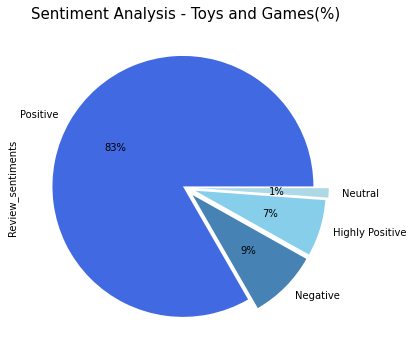

In [15]:
#PLOT THE COUNTS OF SENTIMENTS

plt.figure(figsize=(10,6))
review_toys_games2["Review_sentiments"].value_counts().plot(kind="pie", explode=(0.02,0.08,0.08,0.1),autopct='%1.f%%', colors=("royalblue","steelblue","skyblue", "lightblue")) 
plt.title("Sentiment Analysis - Toys and Games(%)", fontsize=15)
plt.show()

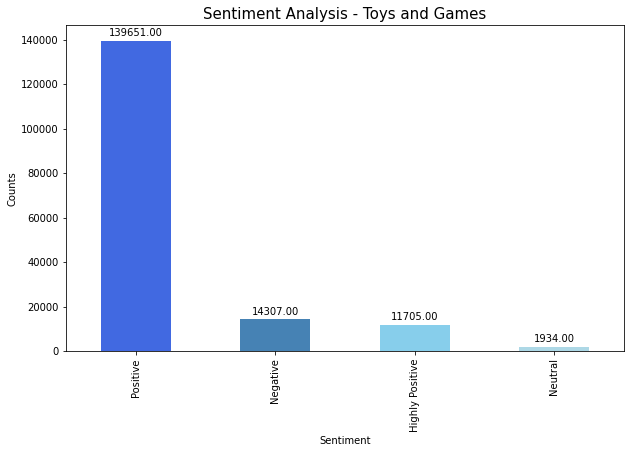

In [16]:
#PLOT THE COUNTS OF SENTIMENTS
plt.bar
plt.figure(figsize=(10,6))
ax = review_toys_games2["Review_sentiments"].value_counts().plot(kind="bar", color=["royalblue","steelblue","skyblue", "lightblue"])
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center', xytext=(0, 8),
                   textcoords='offset points')

plt.title("Sentiment Analysis - Toys and Games", fontsize=15)
plt.xlabel("Sentiment")
plt.ylabel("Counts")
plt.show()


In [17]:
#ACCURACY CHECK 

toys_review_df_sample = review_toys_games2.sample(n=10, random_state=21)   #taking samples from the model to visually check the accuracy

for i in range(0,10):
    print("Review : ",toys_review_df_sample["review"].iloc[i])
    print("Sentiment : ",toys_review_df_sample["Review_sentiments"].iloc[i] )
    print("-----------")

Review :  I'm actually considering buying a second set. These are super cool looking, well crafted, and sturdy enough to bookend some very thick manuals, lol. I started using them for my cookbooks but then realized the folly of not using them for my video games, and so I rectified that situation, lol. Anyway, if you're looking at these, then you already have played Portal 2 or know somebody who has. You wont be disappointed. In a sense, with regards to these bookends, the cake is NOT a lie. :)Super cool
Sentiment :  Positive
-----------
Review :  My Grandson's both wanted this for Christmas. I bought 2 of them. They play with it a lot and use it with their friends on play dates.Boys Love It
Sentiment :  Positive
-----------
Review :  This little LeapFrog tablet has provided hours of fun for a six year old!  He loves the camera/video feature and it has been in constant use while on vacation.  The unit itself is easy for him to manipulate, both technically and physically, and the only co

####**Finding the asin code with most negative sentiments**

In [18]:
review_toys_games2[(review_toys_games2["Review_sentiments"]=="Negative")]["asin"].mode()

0    B004S8F7QM
dtype: object

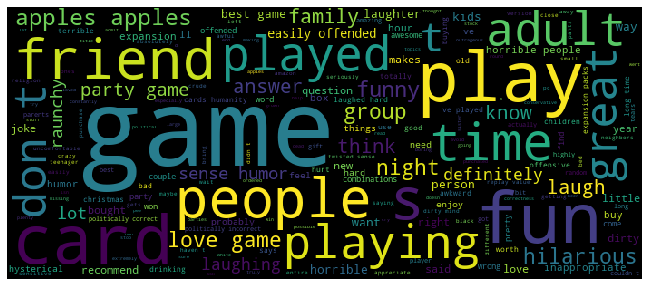

In [19]:
negative_df=review_toys_games2[(review_toys_games2["Review_sentiments"]=="Negative") & (review_toys_games2["asin"]=="B004S8F7QM")]

plt.figure(figsize=(19,5))
allwords = ' '.join([i for i in negative_df.cleantext])
word= WordCloud(width = 700, height = 300, random_state =21, max_font_size = 119, background_color='black').generate(allwords)

plt.imshow(word, interpolation = "none")
plt.axis("off")
plt.show()

In [20]:
from pyabsa import available_checkpoints
# ATEPC >> Aspect Term Extraction Polarity Classification
from pyabsa import ATEPCCheckpointManager
aspect_extractor = ATEPCCheckpointManager.get_aspect_extractor(checkpoint='english',auto_device=True)

There may be some checkpoints available for early versions of PyABSA, see ATEPC
Notice: The pretrained model are used for testing, it is recommended to train the model on your own custom datasets


577MB [00:05, 97.27MB/s, Downloading checkpoint...]                          

Find zipped checkpoint: ./checkpoints/ATEPC_ENGLISH_CHECKPOINT/fast_lcf_atepc_English_cdw_apcacc_85.4_apcf1_82.53_atef1_80.19.zip, unzipping...


Done.
If the auto-downloading failed, please download it via browser: https://huggingface.co/spaces/yangheng/PyABSA-ATEPC/resolve/main/checkpoint/English/ATEPC/fast_lcf_atepc_English_cdw_apcacc_85.4_apcf1_82.53_atef1_80.19.zip 
Load aspect extractor from ./checkpoints/ATEPC_ENGLISH_CHECKPOINT
config: ./checkpoints/ATEPC_ENGLISH_CHECKPOINT/fast_lcf_atepc.config
state_dict: ./checkpoints/ATEPC_ENGLISH_CHECKPOINT/fast_lcf_atepc.state_dict
model: None
tokenizer: ./checkpoints/ATEPC_ENGLISH_CHECKPOINT/fast_lcf_atepc.tokenizer


Downloading:   0%|          | 0.00/579 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/371M [00:00<?, ?B/s]

Some weights of the model checkpoint at microsoft/deberta-v3-base were not used when initializing DebertaV2Model: ['lm_predictions.lm_head.LayerNorm.weight', 'lm_predictions.lm_head.dense.weight', 'mask_predictions.LayerNorm.bias', 'mask_predictions.classifier.weight', 'lm_predictions.lm_head.bias', 'lm_predictions.lm_head.dense.bias', 'mask_predictions.LayerNorm.weight', 'mask_predictions.dense.weight', 'lm_predictions.lm_head.LayerNorm.bias', 'mask_predictions.classifier.bias', 'mask_predictions.dense.bias']
- This IS expected if you are initializing DebertaV2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/usr/local/lib/python3.7/dist-packages/transformers/convert_slow_tokenizer.py:447: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  "The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option"
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [21]:
reasons=[]
for i in negative_df['review']:
  reasons.append(aspect_extractor.extract_aspect(inference_source=[i], pred_sentiment=True))

/usr/local/lib/python3.7/dist-packages/transformers/models/deberta_v2/modeling_deberta_v2.py:746: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  scale, dtype=query_layer.dtype
/usr/local/lib/python3.7/dist-packages/pyabsa/core/atepc/prediction/aspect_extractor.py:362: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  lcf_cdm_vec = torch.tensor([f.lcf_cdm_vec for f in infer_features], dtype=torch.float32)
/usr/local/lib/python3.7/dist-packages/pyabsa/core/atepc/prediction/aspect_extractor.py:410: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = [float

The results of aspect term extraction have been saved in /content/atepc_inference.result.json
Example 0: Bewst <game:Positive Confidence:0.9531136751174927> ever ! And I hate games , but I WILL play this <game:Positive Confidence:0.9531136751174927> every time . Makes me almost pee my pants every time I play it with friends . If you don ' t have it , you really need to buy it . You ' ll never regret it , unless you don ' t like to laugh . Cards against Humanity
The results of aspect term extraction have been saved in /content/atepc_inference.result.json
Example 0: Bought this for my brother for Christmas and he loved it ! There are some cards that I don ' t think I would ever be able to use and not feel guilty . . . but with that said it is impossible not to laugh like crazy with come of the combinations ! I bought this through Amazon from the seller for $ 25 . . . and they are constantly restocking them . So if you are patient you won ' t have to pay stupid high prices for the game . 

In [22]:
print("The reasons for negative reviews of the most popular negative product of Toys and Games category are : Card Quality, Poor Replay, Adult theme.")

The reasons for negative reviews of the most popular negative product of Toys and Games category are : Card Quality, Poor Replay, Adult theme.


**Finding product name using the reviews**

In [23]:
prd_id=[]
product_name=[]
c=1
for j in review_toys_games2.asin.unique()[:50]:
    prd_id.append(j)
    #print('Product',str(c),':',j)
    #print('-'*40)
    product=[]
    count=[]
    d=review_toys_games2[review_toys_games2['asin']==j]['review']
    for i in d :
        nlp= spacy.load('en_core_web_sm')
        dat= nlp(i)
        for w in dat.ents:
            if w.label_=='PERSON':
              count.append(w.text)
            if w.label_=="ORG":
              count.append(w.text)
          
    if count==[]:
      product_name.append("games.NA")
    else:
      a=Counter(count).most_common(1)[:1][0][0]
      product_name.append(a)
    
    c+=1
    #print('*'*40)

print("Here are the list of first 20 ASIN code and their respective product names : ")
print()  
toys_product_names=pd.DataFrame()
toys_product_names["ASIN Code"]=prd_id
toys_product_names["Product Name"]= product_name
toys_product_names.head(20)

Here are the list of first 20 ASIN code and their respective product names : 



,ASIN Code,Product Name
0,0439893577,doug
1,048645195X,Marty Noble
2,0545496470,Great Book
3,0615444172,games.NA
4,0670010936,Llama Llama
5,0735308365,ABC
6,0735321396,WONDERFUL!He
7,073533305X,kids.great
8,0735333483,kinda goofy
9,073533417X,Mudpuppy


In [24]:
prd_id=[]
product_name=[]
c=1
for j in review_toys_games2.asin.unique()[:50]:
    prd_id.append(j)
    #print('Product',str(c),':',j)
    #print('-'*40)
    product=[]
    count=[]
    d=review_toys_games2[review_toys_games2['asin']==j]['review']
    for i in d :
        nlp= spacy.load('en_core_web_sm')
        dat= nlp(i)
        for w in dat.ents:
            if w.label_=='PERSON':
              count.append(w.text)
            if w.label_=="ORG":
              count.append(w.text)
          
    if count==[]:
      product_name.append("games.NA")
    else:
      a=Counter(count).most_common(1)[:1][0][0]
      product_name.append(a)
    
    c+=1
    #print('*'*40)

print("Here are the list of first 20 ASIN code and their respective product names : ")
print()  
toys_product_names=pd.DataFrame()
toys_product_names["ASIN Code"]=prd_id
toys_product_names["Product Name"]= product_name
toys_product_names.head(20)

Here are the list of first 20 ASIN code and their respective product names : 



,ASIN Code,Product Name
0,0439893577,doug
1,048645195X,Marty Noble
2,0545496470,Great Book
3,0615444172,games.NA
4,0670010936,Llama Llama
5,0735308365,ABC
6,0735321396,WONDERFUL!He
7,073533305X,kids.great
8,0735333483,kinda goofy
9,073533417X,Mudpuppy


In [25]:
#Saving the dataframe as csv file for future forecasting
review_toys_games2.to_csv('/content/drive/MyDrive/ML/Data/project/Review toys and games.csv')

#**Data Pre-processing for video games dataset**

In [26]:
#IMPORTING DATA IN PANDAS

review_video_games = pd.read_json("/content/drive/MyDrive/ML/Data/reviews_Video_Games_5.json.gz", lines=True)
review_video_games.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2HD75EMZR8QLN,0700099867,123,"[8, 12]",Installing the game was a struggle (because of...,1,Pay to unlock content? I don't think so.,1341792000,"07 9, 2012"
1,A3UR8NLLY1ZHCX,0700099867,"Alejandro Henao ""Electronic Junky""","[0, 0]",If you like rally cars get this game you will ...,4,Good rally game,1372550400,"06 30, 2013"
2,A1INA0F5CWW3J4,0700099867,"Amazon Shopper ""Mr.Repsol""","[0, 0]",1st shipment received a book instead of the ga...,1,Wrong key,1403913600,"06 28, 2014"
3,A1DLMTOTHQ4AST,0700099867,ampgreen,"[7, 10]","I got this version instead of the PS3 version,...",3,"awesome game, if it did not crash frequently !!",1315958400,"09 14, 2011"
4,A361M14PU2GUEG,0700099867,"Angry Ryan ""Ryan A. Forrest""","[2, 2]",I had Dirt 2 on Xbox 360 and it was an okay ga...,4,DIRT 3,1308009600,"06 14, 2011"


In [27]:
#Calling the datacheck function

review_video_games1= datacheck(review_video_games)
review_video_games1.head()

Total dataset: (231780, 9)

Number of reviews:  231780

Number of unique reviewers:  24303

Number of unique products:  10672

Average rating score:  4.086

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231780 entries, 0 to 231779
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   reviewerID      231780 non-null  object
 1   asin            231780 non-null  object
 2   reviewerName    228967 non-null  object
 3   helpful         231780 non-null  object
 4   reviewText      231780 non-null  object
 5   Rating          231780 non-null  int64 
 6   summary         231780 non-null  object
 7   unixReviewTime  231780 non-null  int64 
 8   reviewTime      231780 non-null  object
dtypes: int64(2), object(7)
memory usage: 15.9+ MB
None



,reviewerID,asin,reviewerName,helpful,reviewText,Rating,summary,unixReviewTime,reviewTime
0,A2HD75EMZR8QLN,0700099867,123,"[8, 12]",Installing the game was a struggle (because of...,1,Pay to unlock content? I don't think so.,1341792000,"07 9, 2012"
1,A3UR8NLLY1ZHCX,0700099867,"Alejandro Henao ""Electronic Junky""","[0, 0]",If you like rally cars get this game you will ...,4,Good rally game,1372550400,"06 30, 2013"
2,A1INA0F5CWW3J4,0700099867,"Amazon Shopper ""Mr.Repsol""","[0, 0]",1st shipment received a book instead of the ga...,1,Wrong key,1403913600,"06 28, 2014"
3,A1DLMTOTHQ4AST,0700099867,ampgreen,"[7, 10]","I got this version instead of the PS3 version,...",3,"awesome game, if it did not crash frequently !!",1315958400,"09 14, 2011"
4,A361M14PU2GUEG,0700099867,"Angry Ryan ""Ryan A. Forrest""","[2, 2]",I had Dirt 2 on Xbox 360 and it was an okay ga...,4,DIRT 3,1308009600,"06 14, 2011"


In [28]:
#Checking For Duplicated Values
review_video_games1[review_video_games1.duplicated(['reviewerName','asin'],keep= False)]

,reviewerID,asin,reviewerName,helpful,reviewText,Rating,summary,unixReviewTime,reviewTime
625,A3NLI44GQY8K48,B00000DMB3,Amazon Customer,"[0, 0]",This could be the best game of all time. What ...,5,The Best Game of All Time?,1306022400,"05 22, 2011"
626,A31RM5QU797HPJ,B00000DMB3,Amazon Customer,"[10, 15]","I'm what gamers call a ""Zelda Veteran"" , I've ...",5,A timeless classic!,1018396800,"04 10, 2002"
904,A3UL0GVERO3CYV,B00000F1GM,Nate,"[1, 1]",I think Mario is a great game. Fighting Bowse...,5,Super Mario 64 is the Greatest Hit to remember,1016236800,"03 16, 2002"
905,A1055QXUA6BOEL,B00000F1GM,Nate,"[4, 4]","Hello again, friends. What bad can be said abo...",5,The First 3D Mario Is The Best,1008979200,"12 22, 2001"
1007,A3OU09O34BC73,B00000I1BF,NaN,"[0, 0]",classic game for the ps1. i love it and it sti...,5,so fun!!,1405209600,"07 13, 2014"
...,...,...,...,...,...,...,...,...,...
231709,A30Z0GG96D11EO,B00JQHU9RC,NaN,"[0, 0]",I personally do not like the game or the feel ...,5,What year is this?,1404086400,"06 30, 2014"
231710,AAMU00SSB7TYG,B00JQHU9RC,NaN,"[0, 0]","Me? I don't get Minecraft, but my kids LOVE it...",5,Kids love this version better than their iPod ...,1403740800,"06 26, 2014"
231711,A312UBIOP091MH,B00JQHU9RC,NaN,"[0, 0]",My teenage son has had the PC version of Minec...,4,A great PC game now for the PS3,1404000000,"06 29, 2014"
231712,A3L1MEXXDI4Q77,B00JQHU9RC,NaN,"[0, 0]","There is a lot to do in this game. Mining, dig...",4,"Weird, Cute Game",1403740800,"06 26, 2014"


In [29]:
#Based on the rating classifying wheather rating is excellent, good, bad or poor
excellent_rating= len(review_video_games1[review_video_games1['Rating']==5])
good_rating= len(review_video_games1[review_video_games1['Rating']==4])
bad_rating= len(review_video_games1[(review_video_games1['Rating'] >=2) & (review_video_games1['Rating'] <=3)])
poor_rating= len(review_video_games1[review_video_games1['Rating']==1])

# Printing rates and their total numbers
print ('Excellent ratings : {} are having Excellent ratings'.format(excellent_rating))
print ('Good ratings : {} are having positive ratings'.format(good_rating))
print ('Bad ratings : {} are having neutral ratings'.format(bad_rating))
print ('Poor ratings : {} are having negative ratings'.format(poor_rating))

Excellent ratings : 120185 are having Excellent ratings
Good ratings : 54804 are having positive ratings
Bad ratings : 41938 are having neutral ratings
Poor ratings : 14853 are having negative ratings


In [30]:

review_video_games2= null(review_video_games1)
review_video_games2.head()

reviewerID           0
asin                 0
reviewerName      2813
helpful              0
reviewText           0
Rating               0
summary              0
unixReviewTime       0
reviewTime           0
dtype: int64


,reviewerID,asin,reviewerName,helpful,Rating,unixReviewTime,reviewTime,review
0,A2HD75EMZR8QLN,0700099867,123,"[8, 12]",1,1341792000,2012-07-09,Installing the game was a struggle (because of...
1,A3UR8NLLY1ZHCX,0700099867,"Alejandro Henao ""Electronic Junky""","[0, 0]",4,1372550400,2013-06-30,If you like rally cars get this game you will ...
2,A1INA0F5CWW3J4,0700099867,"Amazon Shopper ""Mr.Repsol""","[0, 0]",1,1403913600,2014-06-28,1st shipment received a book instead of the ga...
3,A1DLMTOTHQ4AST,0700099867,ampgreen,"[7, 10]",3,1315958400,2011-09-14,"I got this version instead of the PS3 version,..."
4,A361M14PU2GUEG,0700099867,"Angry Ryan ""Ryan A. Forrest""","[2, 2]",4,1308009600,2011-06-14,I had Dirt 2 on Xbox 360 and it was an okay ga...


In [31]:
text= cleaning(review_video_games2["review"])
review_video_games2['cleantext']= text
review_video_games2

,reviewerID,asin,reviewerName,helpful,Rating,unixReviewTime,reviewTime,review,cleantext
0,A2HD75EMZR8QLN,0700099867,123,"[8, 12]",1,1341792000,2012-07-09,Installing the game was a struggle (because of...,installing game struggle games windows live bu...
1,A3UR8NLLY1ZHCX,0700099867,"Alejandro Henao ""Electronic Junky""","[0, 0]",4,1372550400,2013-06-30,If you like rally cars get this game you will ...,like rally cars game fun oriented european mar...
2,A1INA0F5CWW3J4,0700099867,"Amazon Shopper ""Mr.Repsol""","[0, 0]",1,1403913600,2014-06-28,1st shipment received a book instead of the ga...,st shipment received book instead game nd ship...
3,A1DLMTOTHQ4AST,0700099867,ampgreen,"[7, 10]",3,1315958400,2011-09-14,"I got this version instead of the PS3 version,...",got version instead ps3 version turned mistake...
4,A361M14PU2GUEG,0700099867,"Angry Ryan ""Ryan A. Forrest""","[2, 2]",4,1308009600,2011-06-14,I had Dirt 2 on Xbox 360 and it was an okay ga...,dirt xbox okay game started playing games lapt...
...,...,...,...,...,...,...,...,...,...
231775,A1ICREREXO9J81,B00KHECZXO,Frustrated gamer,"[0, 1]",5,1405814400,2014-07-20,Funny people on here are rating sellers that a...,funny people rating sellers ripping supposedly...
231776,A3VVMIMMTYQV5F,B00KHECZXO,Johnny Saigon,"[8, 11]",1,1403308800,2014-06-21,All this is is the Deluxe 32GB Wii U with Mari...,deluxe gb wii u mario kart separately limited ...
231777,A1DD4B97M4DUC5,B00KHECZXO,migit,"[62, 66]",1,1401321600,2014-05-29,The package should have more red on it and sho...,package red steering wheel s retail value ship...
231778,A2Q9CNJ4T6ZK99,B00KHECZXO,"Philip Brown ""Philip & Chana""","[33, 36]",1,1401667200,2014-06-02,Can get this at Newegg for $329.00 and the pac...,newegg packaging alittle arrived box red looks...


In [32]:
review_video_games2['review_polarity']= review_video_games2['review'].apply(getpolarity)

review_video_games2['Review_sentiments']= review_video_games2['review_polarity'].apply(getanalysis)

review_video_games2.head()

,reviewerID,asin,reviewerName,helpful,Rating,unixReviewTime,reviewTime,review,cleantext,review_polarity,Review_sentiments
0,A2HD75EMZR8QLN,0700099867,123,"[8, 12]",1,1341792000,2012-07-09,Installing the game was a struggle (because of...,installing game struggle games windows live bu...,-0.000189,Negative
1,A3UR8NLLY1ZHCX,0700099867,"Alejandro Henao ""Electronic Junky""","[0, 0]",4,1372550400,2013-06-30,If you like rally cars get this game you will ...,like rally cars game fun oriented european mar...,0.112500,Positive
2,A1INA0F5CWW3J4,0700099867,"Amazon Shopper ""Mr.Repsol""","[0, 0]",1,1403913600,2014-06-28,1st shipment received a book instead of the ga...,st shipment received book instead game nd ship...,-0.171429,Negative
3,A1DLMTOTHQ4AST,0700099867,ampgreen,"[7, 10]",3,1315958400,2011-09-14,"I got this version instead of the PS3 version,...",got version instead ps3 version turned mistake...,0.002019,Positive
4,A361M14PU2GUEG,0700099867,"Angry Ryan ""Ryan A. Forrest""","[2, 2]",4,1308009600,2011-06-14,I had Dirt 2 on Xbox 360 and it was an okay ga...,dirt xbox okay game started playing games lapt...,0.190795,Positive


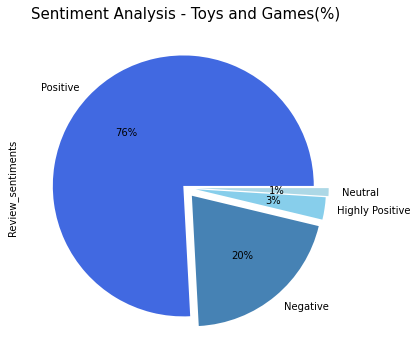

In [33]:
#PLOT THE COUNTS OF SENTIMENTS

plt.figure(figsize=(10,6))
review_video_games2["Review_sentiments"].value_counts().plot(kind="pie", explode=(0.02,0.08,0.08,0.1),autopct='%1.f%%', colors=("royalblue","steelblue","skyblue", "lightblue")) 
plt.title("Sentiment Analysis - Toys and Games(%)", fontsize=15)
plt.show()

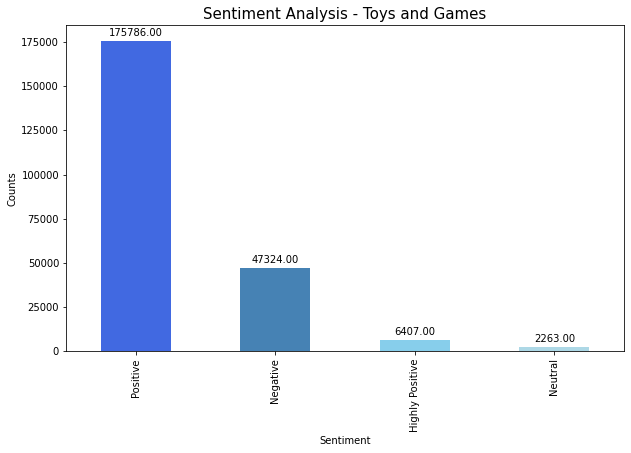

In [34]:
#PLOT THE COUNTS OF SENTIMENTS
plt.bar
plt.figure(figsize=(10,6))
ax = review_video_games2["Review_sentiments"].value_counts().plot(kind="bar", color=["royalblue","steelblue","skyblue", "lightblue"])
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center', xytext=(0, 8),
                   textcoords='offset points')

plt.title("Sentiment Analysis - Toys and Games", fontsize=15)
plt.xlabel("Sentiment")
plt.ylabel("Counts")
plt.show()

In [35]:
#ACCURACY CHECK 

toys_review_df_sample = review_video_games2.sample(n=10, random_state=21)   #taking samples from the model to visually check the accuracy

for i in range(0,10):
    print("Review : ",toys_review_df_sample["review"].iloc[i])
    print("Sentiment : ",toys_review_df_sample["Review_sentiments"].iloc[i] )
    print("-----------")

Review :  the  game sucks you right in with the well written and sometimes funny story especially the gunplay is fluid,creative and really unique with dept to it.The graphics weren't appealing at first but the comic book style really has good production valueTry it you won't regret itWorth It. Great Experience
Sentiment :  Positive
-----------
Review :  I had taken a break from this genre for a long time becuase I was getting tired of the disappointment from games of the likes. I decided to take a break from FPS and take a chance on this title. WOW!!! Was I pleasently surprised. Not since Crash Bandicoot have I enjoyed a game of this nature... and lets face it.... this game is Crash Bandicoot with Firearms. Great lighthearted humor.... Great variety in maps.... Great variety in weapons.... Great variety in enemies.... Great Fun!!!! Some people have stated that the game is a little too easy... not so. It is approxamatly 18 hours long (double that if you want all the upgrades to the weap

####**Finding the asin code with most negative sentiments**

In [36]:
review_video_games2[(review_video_games2["Review_sentiments"]=="Negative")]["asin"].mode()

0    B00178630A
dtype: object

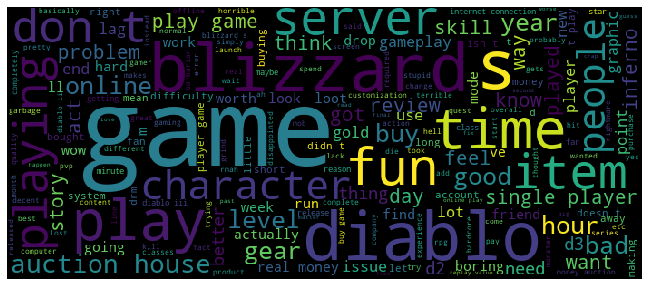

In [37]:
negative_df1=review_video_games2[(review_video_games2["Review_sentiments"]=="Negative") & (review_video_games2["asin"]=="B00178630A")]

plt.figure(figsize=(19,5))
allwords = ' '.join([i for i in negative_df1.cleantext])
word= WordCloud(width = 700, height = 300, random_state =21, max_font_size = 119, background_color='black').generate(allwords)

plt.imshow(word, interpolation = "none")
plt.axis("off")
plt.show()

In [38]:
reasons=[]
for i in negative_df1['review']:
  reasons.append(aspect_extractor.extract_aspect(inference_source=[i], pred_sentiment=True))

/usr/local/lib/python3.7/dist-packages/transformers/models/deberta_v2/modeling_deberta_v2.py:746: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  scale, dtype=query_layer.dtype


The results of aspect term extraction have been saved in /content/atepc_inference.result.json
Example 0: Diablo 3 has been fun , but Mac users beware - - while Blizzard says this game is supported for the Mac , any Mac with the Nvidia 9400M video card ( which is many Macbooks , including my 2010 13in Macbook Pro ) will NOT play the game satisfactorily . Even on the lowest graphic settings the game is too sluggish to play ( 5 - 10 FPS ) . At the beginning of the game this lag seems tolerable when there are only a few monsters on the screen , but as you progress into more advanced acts the game slows down to the point where all you do is die to unseen hordes stuttering around the screen . This looks like a fun game , but now I ' ve been forced to buy a new computer or ask for a refund - - it simply cannot play on Macs with Nvidia 9400M cards ! Wait to see if Blizzard fixes this , and the game might be cheaper by then too . Unplayable on Mac
The results of aspect term extraction have been

/usr/local/lib/python3.7/dist-packages/pyabsa/core/atepc/prediction/aspect_extractor.py:410: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = [float(x) for x in F.softmax(i_apc_logits).cpu().numpy().tolist()]


The results of aspect term extraction have been saved in /content/atepc_inference.result.json
Example 0: No <offline mode:Negative Confidence:0.9996989965438843> how pathetic . . . . Internet connection is mandatory and Blizzard guess what ? You are not getting ANY money from me until this game is offline , I want to play it without an internet connection , not everyone has an internet connection all the time . Pathetic . Bad Blizzard
The results of aspect term extraction have been saved in /content/atepc_inference.result.json
Example 0: Diablo 3 has been one of those games that has been labelled as garbage and it ' s really a shame . I believe there are three main complaints against the game : 1 ) Real Money Auction HousePeople feel that this breaks the game because others can come in with real money , do half the work , and be ready to take on the mobs in Inferno . First off , no . You can have the BEST gear in the game , and still get your butt handed to you in Inferno , even with t

In [39]:
print("The reasons for negative reviews of the most popular negative product are : Server and Installing.")

The reasons for negative reviews of the most popular negative product are : Server and Installing.


**Finding the product name using reviewText**

In [40]:
prd_id=[]
product_name=[]
c=1
for j in review_video_games2.asin.unique()[:50]:
    prd_id.append(j)
    #print('Product',str(c),':',j)
    #print('-'*40)
    product=[]
    count=[]
    d=review_video_games2[review_video_games2['asin']==j]['review']
    for i in d :
        nlp= spacy.load('en_core_web_sm')
        dat= nlp(i)
        for w in dat.ents:
            if w.label_=='PERSON':
              count.append(w.text)
            if w.label_=="ORG":
              count.append(w.text)
          
    if count==[]:
      product_name.append("games.NA")
    else:
      a=Counter(count).most_common(1)[:1][0][0]
      product_name.append(a)
    
    c+=1
    #print('*'*40)

print("Here are the list of first 20 ASIN code and their respective product names : ")
print()  
toys_product_names=pd.DataFrame()
toys_product_names["ASIN Code"]=prd_id
toys_product_names["Product Name"]= product_name
toys_product_names.head(20)

Here are the list of first 20 ASIN code and their respective product names : 



,ASIN Code,Product Name
0,0700099867,Microsoft
1,6050036071,WII
2,7100027950,Nintendo
3,7293000936,Wii
4,8176503290,HAWX
5,907843905X,the Creator's Forum
6,9625990674,AMAZINGGREAT
7,9861019731,Nintendo
8,9882155456,GameCube
9,B000003SQQ,N64


**Saving dataframe as csv file**

In [41]:
#Saving the DataFrame for future forecast
review_video_games2.to_csv('/content/drive/MyDrive/ML/Data/project/video games.csv')

RELATION/BUYING TRENDS BETWEEN COMMON CUSTOMERS

###**Finding the relation/Buying trends between common customers**

In [42]:
#FINDING THE LIST OF COMMON CUSTOMERS IN BOTH CATEGORIES

common= (review_video_games2.merge(review_toys_games2, how="inner", on="reviewerID"))["reviewerID"].unique()
common

array(['ANW6EGY12V5XS', 'A4PPZNQF1X2IY', 'A1IZGZFO1W4UX0', ...,
       'A3DEMJM66762AA', 'AOIF9ILHW5TAG', 'A1QYTCXVMPWA2E'], dtype=object)

In [44]:
#COMMON CUSTOMER COUNT 

vgames_common_df=(review_video_games2[review_video_games2["reviewerID"].str.contains('|'.join(common), case=False) ])
print("Total Number of custumers(Reviewer ID) : ", len(review_video_games2.reviewerID.unique())+len(review_toys_games2.reviewerID.unique()))
print("Total number of common csutomer that reviwed both categories : ", len(vgames_common_df))
print("Percentage of common customer : ", (len(vgames_common_df))/(len(review_video_games2.reviewerID.unique())+len(review_toys_games2.reviewerID.unique()))*100)
vgames_common_df[["reviewerID","reviewerName"]]

Total Number of custumers(Reviewer ID) :  43715
Total number of common csutomer that reviwed both categories :  21359
Percentage of common customer :  48.859659155896146


,reviewerID,reviewerName
11,ANW6EGY12V5XS,Henri Savin
33,A4PPZNQF1X2IY,"EugeSchu ""be-bop"""
43,A1IZGZFO1W4UX0,Mike Wahl
48,A19GTQ0YMXO8VW,Shane - AFR
83,A2RLQKE9NHSSZB,Ghost
...,...,...
231742,A1UQBFCERIP7VJ,Margaret Picky
231743,A2XX2A4OJCDNLZ,RatherLiveInKeyWest
231745,A96K1ZGW56S2I,"tvtv3 ""tvtv3"""
231750,A1ZR8AIM298DFT,"Edward Nigma ""TheEnigma313"""


In [45]:
#EXTRACTING THE DATA OF COMMON CUSTOMERS FROM BOTH CATEGORY

vgames_common_df=(review_video_games2[review_video_games2["reviewerID"].str.contains('|'.join(common), case=False) ])
print("Top customer of common data in Video Games : ",Counter(vgames_common_df["reviewerID"]).most_common(5))
print("Top Product of common data in Video Games : ",Counter(vgames_common_df["asin"]).most_common(5))
vgames_common_df=vgames_common_df.set_index((vgames_common_df["reviewTime"]))
vgames_common_df =vgames_common_df['reviewerID'].resample('Y').count()
print()
print("*"*20)


toys_common_df=(review_toys_games2[review_toys_games2["reviewerID"].str.contains('|'.join(common), case=False) ])
print("Top customer of common data in Toys and Games : ",Counter(toys_common_df["reviewerID"]).most_common(5))
print("Top Product of common data in Toys and Games : ",Counter(toys_common_df["asin"]).most_common(5))
toys_common_df=toys_common_df.set_index((toys_common_df["reviewTime"]))
toys_common_df=toys_common_df['reviewerID'].resample('Y').count()


Top customer of common data in Video Games :  [('A3W4D8XOGLWUN5', 456), ('AFV2584U13XP3', 320), ('A2TCG2HV1VJP6V', 272), ('A20DZX38KRBIT8', 268), ('A2582KMXLK2P06', 220)]
Top Product of common data in Video Games :  [('B0009VXBAQ', 76), ('B004VQENY8', 61), ('B00BGA9WK2', 59), ('B0088MVPRY', 58), ('B0015AARJI', 50)]

********************
Top customer of common data in Toys and Games :  [('A2RVCF21L2NPU5', 117), ('A1EVV74UQYVKRY', 116), ('A30H2335OM7RD6', 116), ('A215WH6RUDUCMP', 114), ('A22CW0ZHY3NJH8', 105)]
Top Product of common data in Toys and Games :  [('B0015KVAEE', 64), ('B002DHC6FA', 39), ('B0089RPUHO', 38), ('B003AIM52A', 37), ('B004S8F7QM', 35)]


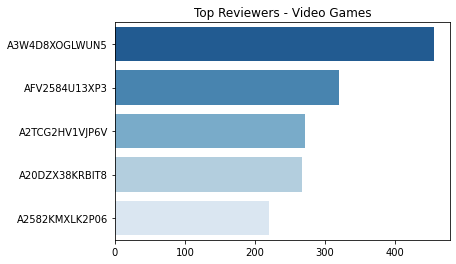

In [47]:
import seaborn as sns
top_customer_video =["A3W4D8XOGLWUN5", 'AFV2584U13XP3','A2TCG2HV1VJP6V', 'A20DZX38KRBIT8','A2582KMXLK2P06']
customer_counts_video=[456,320, 272, 268, 220]
sns.barplot(y = top_customer_video, x = customer_counts_video, palette="Blues_r", orient="h"  )
plt.title("Top Reviewers - Video Games")
plt.show()

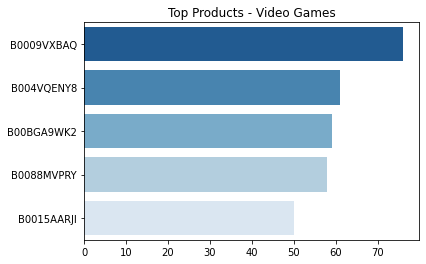

In [48]:
top_product_video = ['B0009VXBAQ','B004VQENY8', 'B00BGA9WK2','B0088MVPRY', 'B0015AARJI']
product_count_video = [ 76, 61, 59, 58, 50]
sns.barplot(y = top_product_video, x = product_count_video, palette="Blues_r", orient="h"  )
plt.title("Top Products - Video Games")
plt.show()

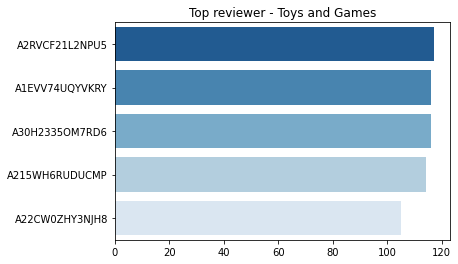

In [49]:
#plt.bar( x=top_customer_video, height=customer_counts_video)
top_customer_toys =['A2RVCF21L2NPU5', 'A1EVV74UQYVKRY', 'A30H2335OM7RD6', 'A215WH6RUDUCMP', 'A22CW0ZHY3NJH8']
customer_counts_toys=[117, 116 , 116, 114, 105]
sns.barplot(y = top_customer_toys, x = customer_counts_toys, palette="Blues_r", orient="h"  )
plt.title("Top reviewer - Toys and Games")
plt.show()

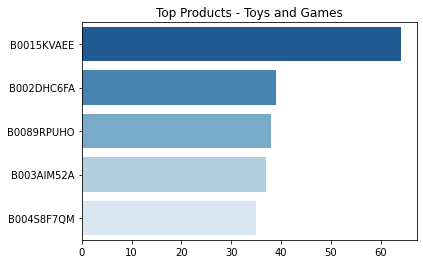

In [50]:
top_product_toys = ['B0015KVAEE', 'B002DHC6FA', 'B0089RPUHO', 'B003AIM52A', 'B004S8F7QM']
product_count_video = [64, 39, 38, 37, 35]
sns.barplot(y = top_product_toys, x = product_count_video, palette="Blues_r", orient="h" ,  )
plt.title("Top Products - Toys and Games")
plt.show()

In [52]:
#EXTRACTING THE DATA OF COMMON CUSTOMERS FROM BOTH CATEGORY

vgames_common_df=(review_video_games2[review_video_games2["reviewerID"].str.contains('|'.join(common), case=False) ])
print("Top customer of common data in Video Games : ",Counter(vgames_common_df["reviewerID"]).most_common(5))
print("Top Product of common data in Video Games : ",Counter(vgames_common_df["asin"]).most_common(5))
vgames_common_df=vgames_common_df.set_index((vgames_common_df["reviewTime"]))
vgames_common_df =vgames_common_df['reviewerID'].resample('Y').count()
print()
print("*"*20)


toys_common_df=(review_toys_games2[review_toys_games2["reviewerID"].str.contains('|'.join(common), case=False) ])
print("Top customer of common data in Toys and Games : ",Counter(toys_common_df["reviewerID"]).most_common(5))
print("Top Product of common data in Toys and Games : ",Counter(toys_common_df["asin"]).most_common(5))
toys_common_df=toys_common_df.set_index((toys_common_df["reviewTime"]))
toys_common_df=toys_common_df['reviewerID'].resample('Y').count()

Top customer of common data in Video Games :  [('A3W4D8XOGLWUN5', 456), ('AFV2584U13XP3', 320), ('A2TCG2HV1VJP6V', 272), ('A20DZX38KRBIT8', 268), ('A2582KMXLK2P06', 220)]
Top Product of common data in Video Games :  [('B0009VXBAQ', 76), ('B004VQENY8', 61), ('B00BGA9WK2', 59), ('B0088MVPRY', 58), ('B0015AARJI', 50)]

********************
Top customer of common data in Toys and Games :  [('A2RVCF21L2NPU5', 117), ('A1EVV74UQYVKRY', 116), ('A30H2335OM7RD6', 116), ('A215WH6RUDUCMP', 114), ('A22CW0ZHY3NJH8', 105)]
Top Product of common data in Toys and Games :  [('B0015KVAEE', 64), ('B002DHC6FA', 39), ('B0089RPUHO', 38), ('B003AIM52A', 37), ('B004S8F7QM', 35)]


In [54]:
#EXTRACTING THE DATA OF UNCOMMON CUSTOMERS FROM BOTH CATEGORY

vgames_not_common_df=(review_video_games2[~review_video_games2["reviewerID"].str.contains('|'.join(common) ,na=False) ])
print("Top customer of uncommon data in Video Games : ",Counter(vgames_not_common_df["reviewerID"]).most_common(5))
print("Top Product of uncommon data in Video Games : ",Counter(vgames_not_common_df["asin"]).most_common(5))
vgames_not_common_df=vgames_not_common_df.set_index((vgames_not_common_df["reviewTime"]))
vgames_not_common_df =vgames_not_common_df['reviewerID'].resample('Y').count()
print()
print("*"*20)


toys_not_common_df=(review_toys_games2[~review_toys_games2["reviewerID"].str.contains('|'.join(common), case=True) ])
print("Top customer of uncommon data in Toys and Games : ",Counter(toys_not_common_df["reviewerID"]).most_common(5))
print("Top Product of uncommon data in Toys and Games : ",Counter(review_toys_games2["asin"]).most_common(5))
toys_not_common_df=toys_not_common_df.set_index((toys_not_common_df["reviewTime"]))
toys_not_common_df=toys_not_common_df['reviewerID'].resample('Y').count()

Top customer of uncommon data in Video Games :  [('A3V6Z4RCDGRC44', 773), ('AJKWF4W7QD4NS', 635), ('A2QHS1ZCIQOL7E', 450), ('A29BQ6B90Y1R5F', 404), ('A1AISPOIIHTHXX', 224)]
Top Product of uncommon data in Video Games :  [('B00BGA9WK2', 743), ('B0015AARJI', 602), ('B007CM0K86', 490), ('B002VBWIP6', 422), ('B0050SYX8W', 411)]

********************
Top customer of uncommon data in Toys and Games :  [('AJGU56YG8G1DQ', 550), ('A1M8AYAL3L8ACP', 168), ('A1II2ZRPKZAQQD', 157), ('A2WW57XX2UVLM6', 151), ('A1POFVVXUZR3IQ', 133)]
Top Product of uncommon data in Toys and Games :  [('B004S8F7QM', 309), ('B0089RPUHO', 253), ('B0039S7NO6', 215), ('B001W30D2O', 207), ('B002NPBT50', 196)]


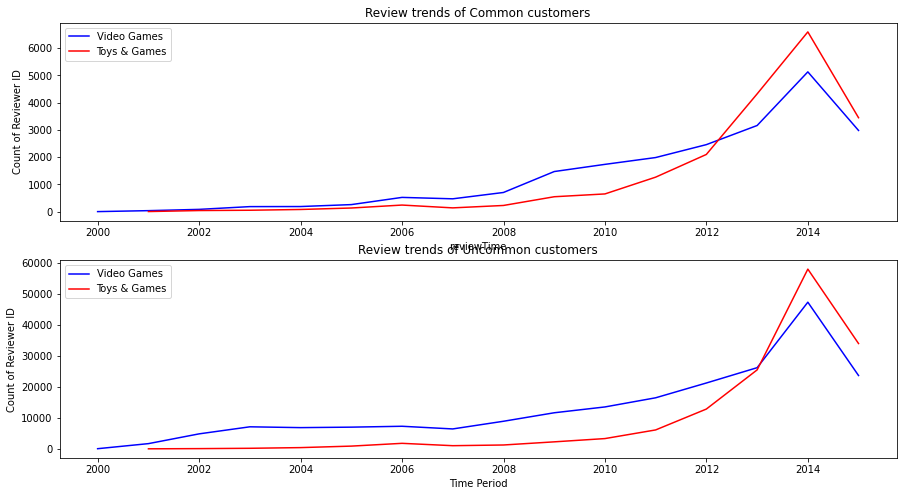

In [55]:
figure, axs= plt.subplots(2,1,figsize=(15,8))

ax=axs[0].set_title("Review trends of Common customers")
#axs[0].set_xlabel("Time Period")
axs[0].set_ylabel("Count of Reviewer ID")
sns.lineplot(x=vgames_common_df.index, y = vgames_common_df, color="blue", ax=axs[0], label="Video Games")
sns.lineplot(x=toys_common_df.index, y = toys_common_df, color="red",ax=axs[0],  label="Toys & Games")

ax=axs[1].set_title("Review trends of Uncommon customers")
ax=axs[1].set_xlabel("Time Period")
ax=axs[1].set_ylabel("Count of Reviewer ID")
sns.lineplot(x=vgames_not_common_df.index, y = vgames_not_common_df, color="blue",ax=axs[1],  label="Video Games")
sns.lineplot(x=toys_not_common_df.index, y = toys_not_common_df, color="red",ax=axs[1],  label="Toys & Games")



plt.show()

These graphs shows the trend between both the Categories, i.e, Toys&Games and VideoGames.



In both the categories there is sudden increase in count of reviews from 2013 to 2014. Also there is decrease in the count of the reviews from 2014 in both the categories.